Mean Squared Error (MSE): 20.47
R² Score: 0.84


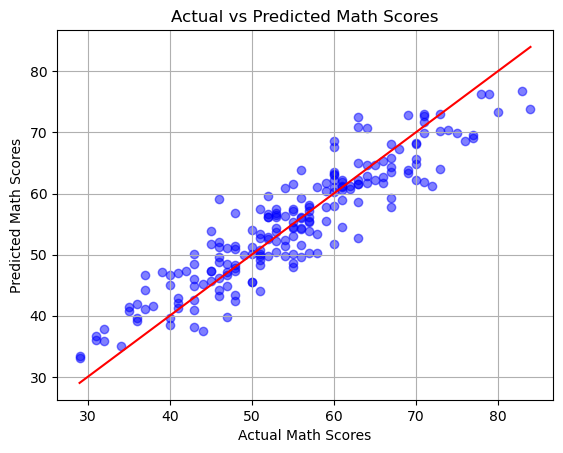

Predicted Math Score for Reading=72, Writing=85: 64.09


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate random dataset
np.random.seed(42)
n = 1000

reading_scores = np.random.randint(40, 100, n)
writing_scores = np.random.randint(40, 100, n)

# Simulate math score with some correlation to reading and writing
math_scores = (0.3 * reading_scores + 0.5 * writing_scores + np.random.normal(0, 5, n)).astype(int)

# Combine into DataFrame
df = pd.DataFrame({
    "reading": reading_scores,
    "writing": writing_scores,
    "math": math_scores
})

# Step 2: Feature selection
X = df[["reading", "writing"]]
y = df["math"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))

# Step 6: Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

# Step 7: Predict new student score
new_input = pd.DataFrame([[72, 85]], columns=["reading", "writing"])
predicted_math = model.predict(new_input)
print(f"Predicted Math Score for Reading=72, Writing=85: {round(predicted_math[0], 2)}")
